# Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2  # Import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image  # Add this import statement
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
samples = glob('/content/drive/MyDrive/dataset/Train/**/*.jpg', recursive= True)

samples[:3]

['/content/drive/MyDrive/dataset/Train/BENIGN/1-126.jpg',
 '/content/drive/MyDrive/dataset/Train/BENIGN/1-047.jpg',
 '/content/drive/MyDrive/dataset/Train/BENIGN/1-226 (2).jpg']

In [4]:
data_dir=('/content/drive/MyDrive/dataset/Train')

In [5]:
# Define image size and batch size
image_size = (254, 254)
batch_size = 32

In [6]:
# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

In [7]:
# Load the dataset from the directory and split it into training and validation sets
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='training'  # Use the training split
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='validation'  # Use the validation split
)

Found 305 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [8]:
import numpy as np
import glob
import random
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

from PIL import Image

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight

from glob import glob
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import time
import copy
from tqdm import tqdm_notebook as tqdm

from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image  # Add this import statement
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

random.seed(98)
np.random.seed(98)

In [9]:
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp, tanh
from tokenize import Exponent
from enum import Enum
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import base64
import pandas as pd
import seaborn as sns
import uuid
import glob
import shutil

In [10]:
# Create an ImageDataGenerator for data augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation sets
)

# Load the dataset from the directory and split it into training and validation sets
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='training'  # Use the training split
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    subset='validation'  # Use the validation split
)

Found 305 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [11]:
BENIGN = []
MALIGNANT = []
NORMAL = []

for img in samples:
    if "BENIGN" in img:
        BENIGN.append(img)
    elif "MALIGNANT" in img:
        MALIGNANT.append(img)
    elif "NORMAL" in img:
        NORMAL.append(img)

print('BENIGN samples: ', BENIGN[:3])
print('MALIGNANT samples: ', MALIGNANT[:3])
print('NORMAL samples: ', NORMAL[:3])
print('BENIGN sample size: ', len(BENIGN))
print('MALIGNANT sample size: ', len(MALIGNANT))
print('NORMAL sample size: ', len(NORMAL))


BENIGN samples:  ['/content/drive/MyDrive/dataset/Train/BENIGN/1-126.jpg', '/content/drive/MyDrive/dataset/Train/BENIGN/1-047.jpg', '/content/drive/MyDrive/dataset/Train/BENIGN/1-226 (2).jpg']
MALIGNANT samples:  ['/content/drive/MyDrive/dataset/Train/MALIGNANT/1-108.jpg', '/content/drive/MyDrive/dataset/Train/MALIGNANT/2-011.jpg', '/content/drive/MyDrive/dataset/Train/MALIGNANT/1-263.jpg']
NORMAL samples:  ['/content/drive/MyDrive/dataset/Train/NORMAL/1-285.jpg', '/content/drive/MyDrive/dataset/Train/NORMAL/1-199 (1).jpg', '/content/drive/MyDrive/dataset/Train/NORMAL/2-115.jpg']
BENIGN sample size:  141
MALIGNANT sample size:  123
NORMAL sample size:  116


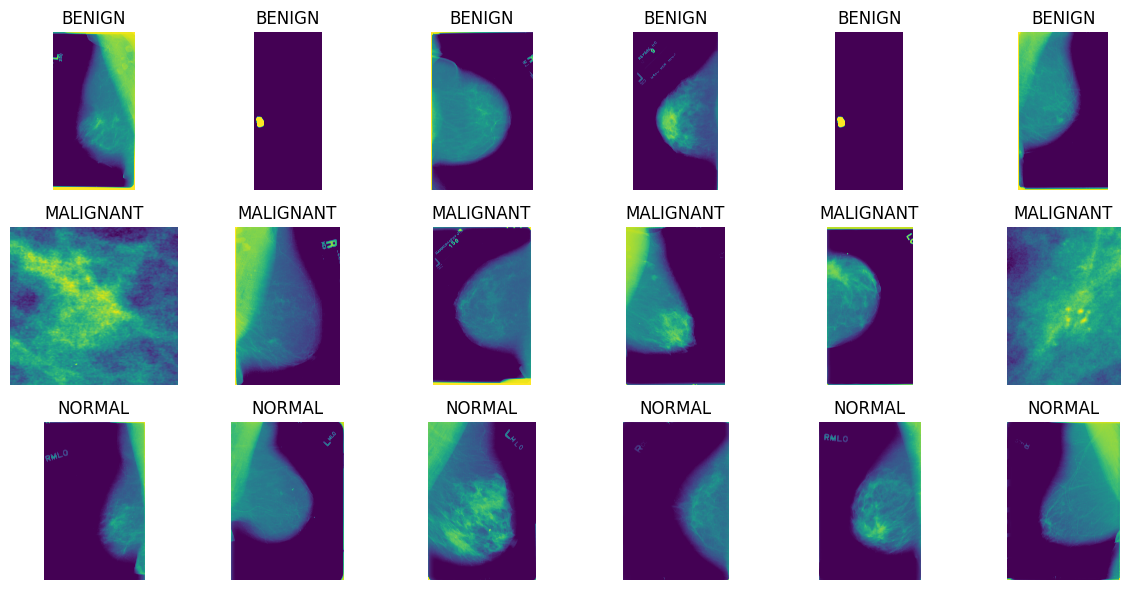

In [12]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Randomly select a few samples for display
sample_size = 6  # You can change this to the number of samples you want to display

# Create subplots for BENIGN patches
plt.figure(figsize=(12, 6))
for i in range(sample_size):
    plt.subplot(3, sample_size, i + 1)
    img = mpimg.imread(random.choice(BENIGN))
    plt.imshow(img)
    plt.axis('off')
    plt.title('BENIGN')

# Create subplots for MALIGNANT patches
for i in range(sample_size):
    plt.subplot(3, sample_size, i + sample_size + 1)
    img = mpimg.imread(random.choice(MALIGNANT))
    plt.imshow(img)
    plt.axis('off')
    plt.title('MALIGNANT')

# Create subplots for NORMAL patches
for i in range(sample_size):
    plt.subplot(3, sample_size, i + 2*sample_size + 1)
    img = mpimg.imread(random.choice(NORMAL))
    plt.imshow(img)
    plt.axis('off')
    plt.title('NORMAL')

plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the image size
IMG_SIZE = (224, 224)  # ResNet's default input size
NUM_SAMPLES_PER_CLASS = 110

# Define lists to store features (X) and labels (y)
X = []
y = []

# Define a function to extract features and labels
def extract_features_labels(sample_paths, label_value):
    count = 0
    for path in sample_paths:
        if count >= NUM_SAMPLES_PER_CLASS:
            break
        img = load_img(path, target_size=IMG_SIZE)
        img = img_to_array(img)
        img = preprocess_input(img)
        X.append(img)
        y.append(label_value)
        count += 1
# Extract features and labels for BENIGN samples (up to 5000)
extract_features_labels(BENIGN, label_value=0)

# Extract features and labels for MALIGNANT samples (up to 5000)
extract_features_labels(MALIGNANT, label_value=1)

# Extract features and labels for NORMAL samples (up to 5000)
extract_features_labels(NORMAL, label_value=2)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffled_indices = np.arange(len(y))
np.random.shuffle(shuffled_indices)
X = X[shuffled_indices]
y = y[shuffled_indices]

# Check the shape of the features and labels arrays
print("Features shape:", X.shape)
print("Labels shape:", y.shape)




Features shape: (330, 224, 224, 3)
Labels shape: (330,)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into train, test, and predict sets
X_train, X_predict, y_train, y_true = train_test_split(X, y, test_size=0.3, random_state=7)

# Define the ratio for reducing the size of the train and test sets
rate = 0.5
num = int(X_train.shape[0] * rate)

# Reduce the size of the train and test sets
X_test = X_train[num:]
X_train = X_train[:num]

y_test = y_train[num:]
y_train = y_train[:num]

# Convert labels to categorical format
num_classes = 2  # Update to 2 classes (stage1 and stage2)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_true = to_categorical(y_true, 3)

# Print the shapes of the datasets
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('X_predict shape: {}'.format(X_predict.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_true shape: {}'.format(y_true.shape))


X_train shape: (115, 224, 224, 3)
X_test shape: (116, 224, 224, 3)
X_predict shape: (99, 224, 224, 3)
y_train shape: (115, 3)
y_test shape: (116, 3)
y_true shape: (99, 3)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,            # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (fraction of total height)
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill mode for filling in newly created pixels after augmentation
)

In [16]:
base_model = ResNet50V2(weights='imagenet', include_top=False)  # Exclude the top fully connected layers

94668760/94668760 [==============================] - 3s 0us/step


In [17]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model with custom classification layers
base_model = ResNet50V2(weights='imagenet', include_top=False)

# Create a Sequential model for your custom classification task
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Update to 3 classes (BENIGN, MALIGNANT, NORMAL)
])

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24090115 (91.90 MB)
Trainable params: 525315 (2.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.0001

# Create the Adam optimizer with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Compile the model with categorical cross-entropy loss and the Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Model Train

In [19]:
# Define the number of epochs and batch size
num_epochs = 20
batch_size = 32

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Metric to monitor (e.g., validation loss)
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode (0: quiet, 1: update messages)
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [22]:
train_datagen = datagen.flow(X_train, y_train, batch_size=batch_size)

In [23]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

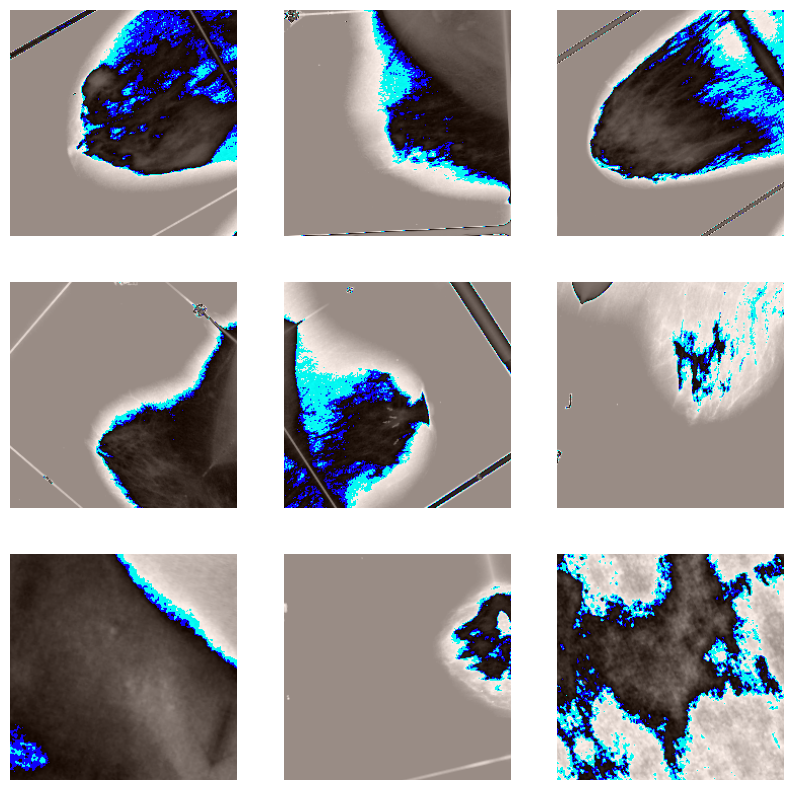

In [24]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation
)

# Create a generator to generate augmented images
augmented_images_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images, _ = next(augmented_images_generator)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].astype("uint8"))
    plt.axis("off")

plt.show()


In [25]:
# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,            # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (fraction of total height)
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill mode for filling in newly created pixels after augmentation
)

# Apply data augmentation to the train dataset using .flow()
train_ds = datagen.flow(X_train, y_train, batch_size=batch_size)

# You can also set other parameters like shuffle and prefetch
# train_ds = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)
# train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(254, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # 3 output classes (stage1, stage2)

In [27]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [28]:
# Compile the model
model.compile(
    optimizer=Adam(lr=0.0001),  # You can adjust the learning rate as needed
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multiclass classification
    metrics=['accuracy']
)

In [ ]:
# Train the model
epochs = 20
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

Epoch 1/20
10/10 [==============================] - 126s 12s/step - loss: 1.3058 - accuracy: 0.4000 - val_loss: 1.3491 - val_accuracy: 0.3600
Epoch 2/20
10/10 [==============================] - 137s 14s/step - loss: 0.9684 - accuracy: 0.5705 - val_loss: 1.0317 - val_accuracy: 0.4533
Epoch 3/20
10/10 [==============================] - 131s 13s/step - loss: 0.8585 - accuracy: 0.6197 - val_loss: 1.1108 - val_accuracy: 0.4800
Epoch 4/20
10/10 [==============================] - 113s 11s/step - loss: 0.8717 - accuracy: 0.6098 - val_loss: 1.1084 - val_accuracy: 0.4533
Epoch 5/20
10/10 [==============================] - 111s 11s/step - loss: 0.8220 - accuracy: 0.6164 - val_loss: 0.9513 - val_accuracy: 0.5200
Epoch 6/20
10/10 [==============================] - 130s 13s/step - loss: 0.7439 - accuracy: 0.6656 - val_loss: 1.1328 - val_accuracy: 0.3733
Epoch 7/20
10/10 [==============================] - 113s 11s/step - loss: 0.7274 - accuracy: 0.6820 - val_loss: 1.0793 - val_accuracy: 0.4667
Epoch 

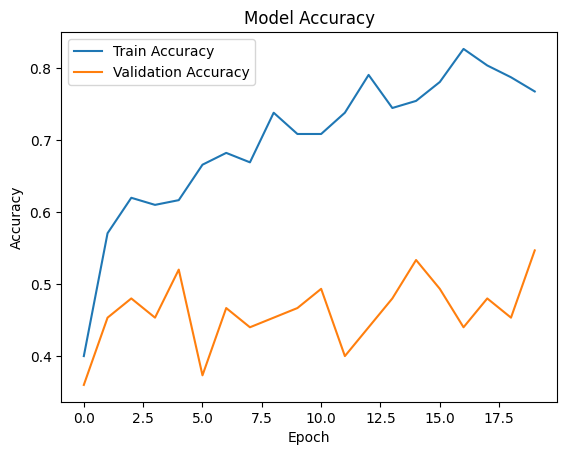

In [30]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

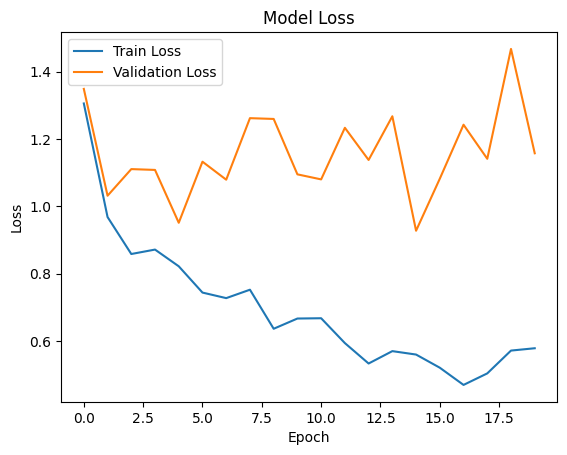

In [31]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

4/4 [==============================] - 19s 4s/step
Accuracy: 0.3333
Precision: 0.1111
Recall: 0.3333
F1 Score: 0.1667


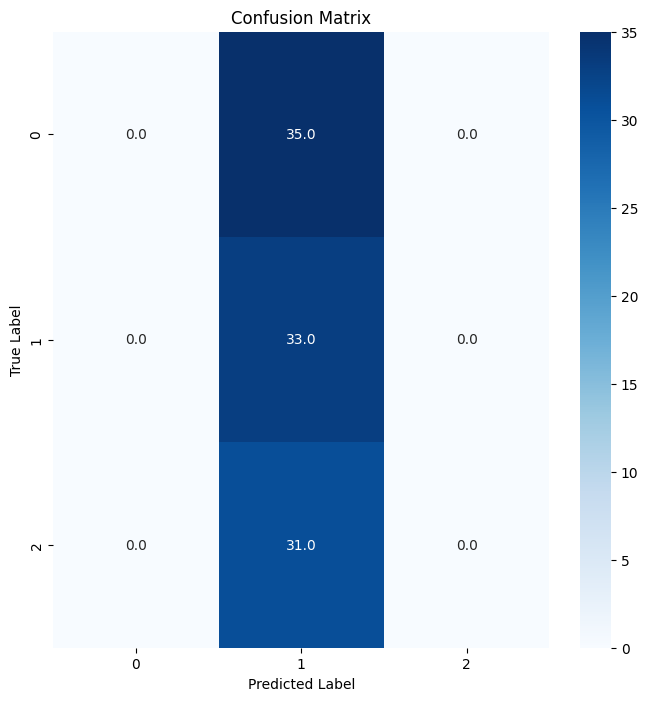

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Assuming you have predicted labels
predicted_labels = model.predict(X_predict)

# Calculate accuracy
accuracy = accuracy_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')
f1 = f1_score(y_true.argmax(axis=1), predicted_labels.argmax(axis=1), average='weighted')
conf_matrix = confusion_matrix(y_true.argmax(axis=1), predicted_labels.argmax(axis=1))

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
# Print the training and validation metrics
print("Training history:")
print(history.history)

Training history:
{'loss': [1.3058263063430786, 0.9683735966682434, 0.8585355877876282, 0.8717008829116821, 0.8220375180244446, 0.7439466118812561, 0.727449357509613, 0.7524564266204834, 0.6364349126815796, 0.6668210625648499, 0.6676930785179138, 0.5938577651977539, 0.5331817865371704, 0.5699625015258789, 0.5597937107086182, 0.5206807255744934, 0.46956437826156616, 0.5038027167320251, 0.57160884141922, 0.5785196423530579], 'accuracy': [0.4000000059604645, 0.5704917907714844, 0.6196721196174622, 0.6098360419273376, 0.6163934469223022, 0.66557377576828, 0.6819671988487244, 0.6688524484634399, 0.7377049326896667, 0.7081966996192932, 0.7081966996192932, 0.7377049326896667, 0.7901639342308044, 0.7442622780799866, 0.7540983557701111, 0.7803278565406799, 0.8262295126914978, 0.8032786846160889, 0.7868852615356445, 0.7672131061553955], 'val_loss': [1.349113941192627, 1.031711220741272, 1.1108012199401855, 1.1083606481552124, 0.9513295292854309, 1.132789969444275, 1.0793224573135376, 1.262156724

In [34]:
# Display sample images from the validation set
sample_batch = next(val_data)  # Get a batch of validation data
sample_images, sample_labels = sample_batch
sample_predictions = model.predict(sample_images)

1/1 [==============================] - 8s 8s/step


In [35]:
# Define class labels
class_labels = ['stage1', 'stage2', 'stage3']

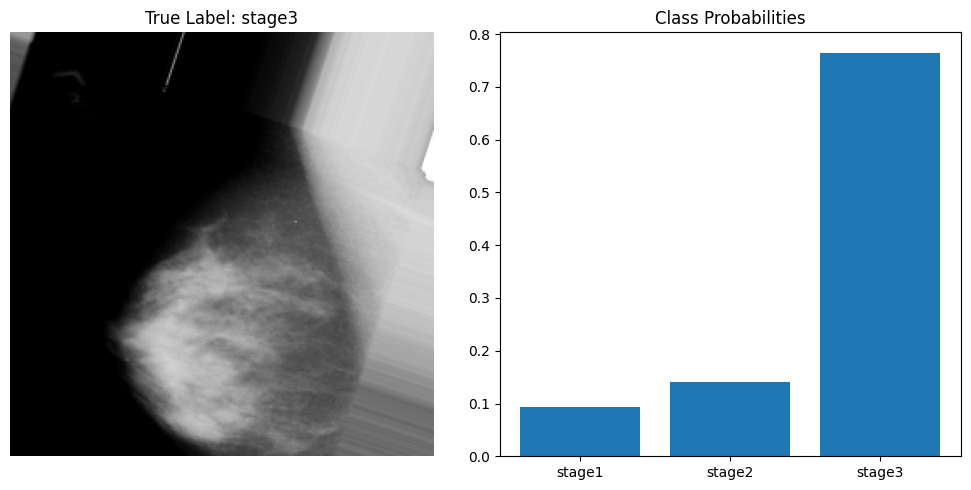

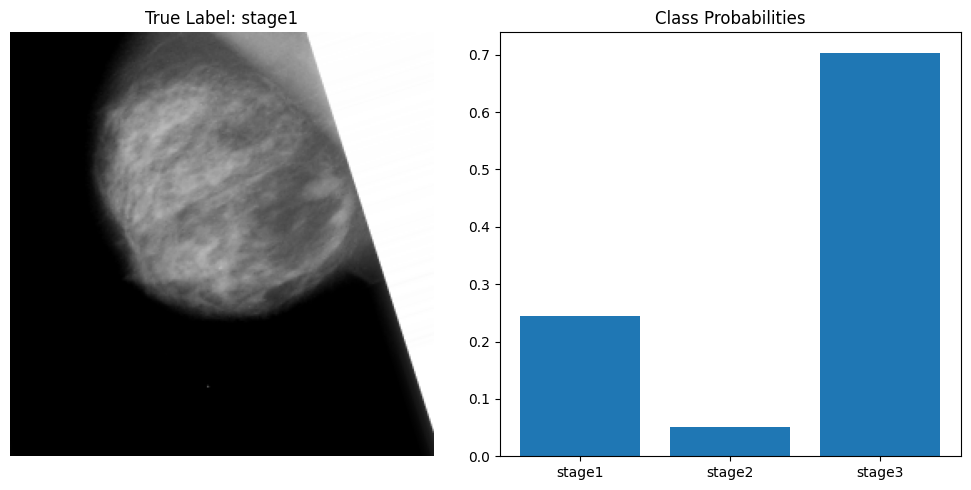

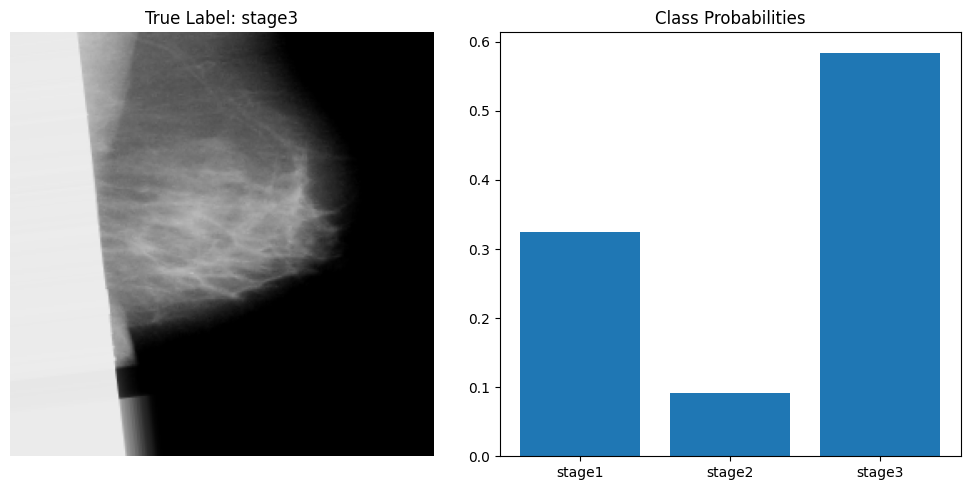

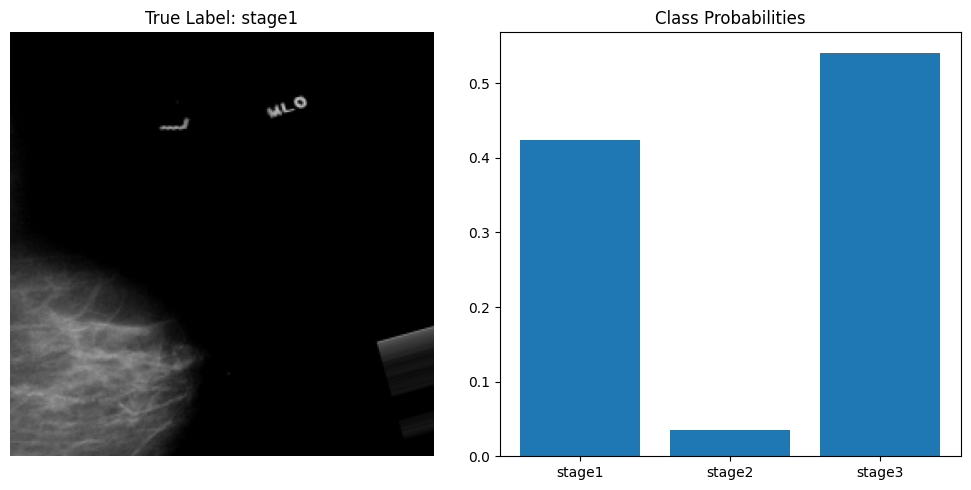

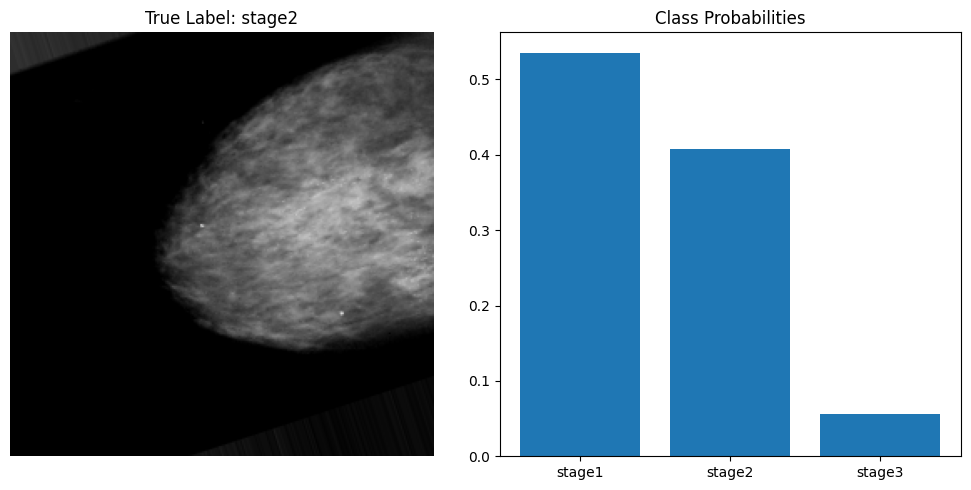

In [36]:
# Display the first few sample images and their predictions
num_samples = min(5, batch_size)
for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample_images[i])
    plt.title(f"True Label: {class_labels[sample_labels[i].argmax()]}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_labels, sample_predictions[i])
    plt.title("Class Probabilities")
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 171ms/step


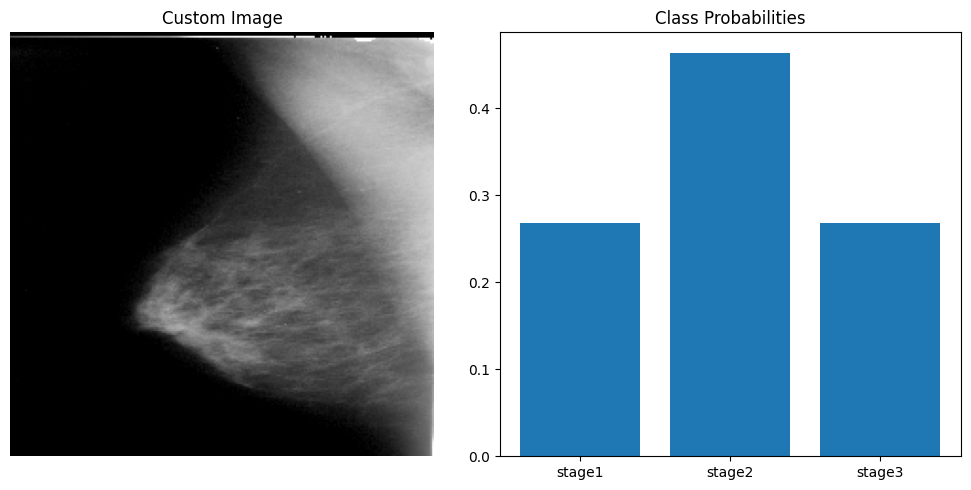

In [37]:
  # Define image size and batch size
image_size = (224, 224)

# Load your custom image for display
custom_image_path = "/content/drive/MyDrive/dataset/Test/MALIGANT/1-145.jpg"
custom_image = image.load_img(custom_image_path, target_size=image_size)
custom_image = image.img_to_array(custom_image)
custom_image = custom_image / 255.0  # Normalize the pixel values to [0, 1]
custom_image = np.expand_dims(custom_image, axis=0)  # Add a batch dimension

# Make predictions on the custom image
custom_predictions = model.predict(custom_image)

# Display the custom image and its predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(custom_image[0])
plt.title("Custom Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(class_labels, custom_predictions[0])
plt.title("Class Probabilities")
plt.tight_layout()
plt.show()